In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN,AffinityPropagation,AgglomerativeClustering

## 0. Data processing and visualization
1. Investigate the ratings.csv dataset, transform it to $(M,N)$ matrix so that each row represents a movie and each column represents a user. So M = number of unique movies, N = number of unique users. $r_{ij}$ is the rating j-th user gave to i-th movie.
2. Fill N/A values with 0.0
3. Investigate the resulting dataset, remove uninformative columns if any.
4. Perform exploratory analysis on the dataset.(correlation matrix, summary statistics barplots of features)

In [2]:
%%time
rate = pd.read_csv('ratings.csv',)
#print(rate.head())
new = np.zeros((rate['movieId'].nunique(),rate['userId'].nunique()))
index = sorted(list(set(rate['movieId'])))
columns = sorted(list(set(rate['userId'])))
new_data = pd.DataFrame(new,index=index,columns=columns)


for i,j,k in zip(rate['userId'],rate['movieId'],rate['rating']):
    new_data[i][j] = k



Wall time: 29.7 s


In [3]:
%%time

(new_data.describe().loc['std']<0.20).index


Wall time: 2.58 s


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', length=610)

In [4]:
new_data1 = new_data.drop(new_data[new_data.duplicated(keep='last')==True].index,axis=0)
new_data1.shape

(6972, 610)

## 1. Reducing Dimentionality of Data
All clustering algorithms benefit from dimensionality reduction. In this task perform PCA and project the dataset to lower dimension. Preserve at least 0.9 of initial variance

In [5]:
%%time
pca = PCA(n_components=0.9)
P1 = pca.fit_transform(new_data1)
P1.shape

Wall time: 2.51 s


(6972, 252)

## 2. Clustering
1. On the projected dataset fit KMeans, choose the best k from values $1,2,...,30$, report silhouette score of the best k
2. On the projected dataset decide minPts and eps, afterwards fit DBSCAN with chosen params, report the silhouette score
3. On the projected dataset fit 3 affinity propagation models, by setting preference to minimum of similarity matrix, mean of similarity matrix, median of similarity matrix.
Report the silhouette scores and choose the best one according to it.
4. Use scipy.cluster.hierarchy.linkage and scipy.cluster.hierarchy.dendrogram to plot dendrograms for [single, average, ward] linkages. Choose best k for each linkages from the dendrograms. Fit aglomerative clustering using the k-s that you chose. Report the three silhouette scores and choose the best model. Use the projected dataset for this task too.


In [16]:
%%time
np.random.seed(40)
sil = []
R = np.random.choice(list(range(0,len(P1))),int(len(P1)*0.2))
for i in range(2,31):
    K = KMeans(n_clusters=i)
    
    pred = K.fit_predict(P1[R])
    
    sil.append(silhouette_score(P1[R],pred))
    if len(sil)>1 and sil[-2]>sil[-1]:
        c=i-1
        max1 = max(sil) 
        break


Wall time: 1.26 s


In [17]:
print('The best k from values  1,2,...,30  is %s with silhouette_score = %s' %(c,max1))

The best k from values  1,2,...,30  is 2 with silhouette_score = 0.5415781928054868


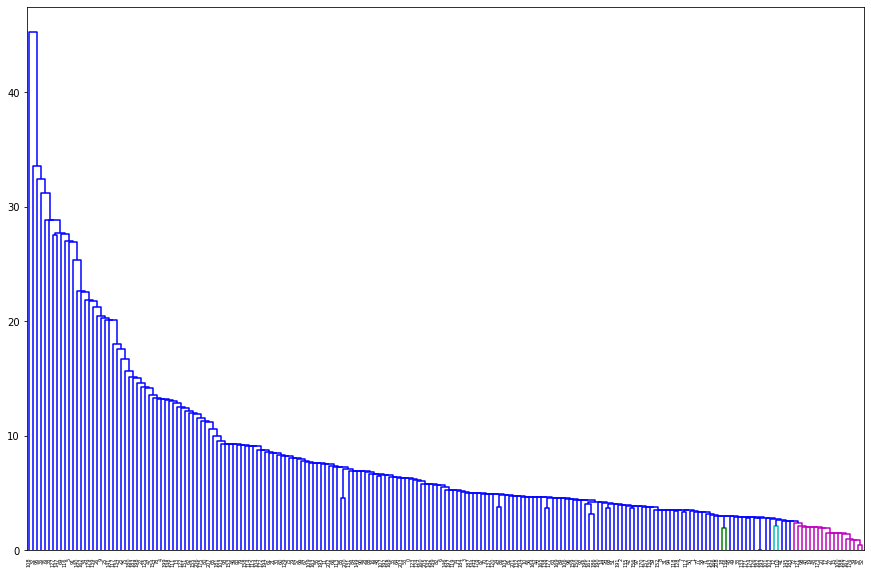

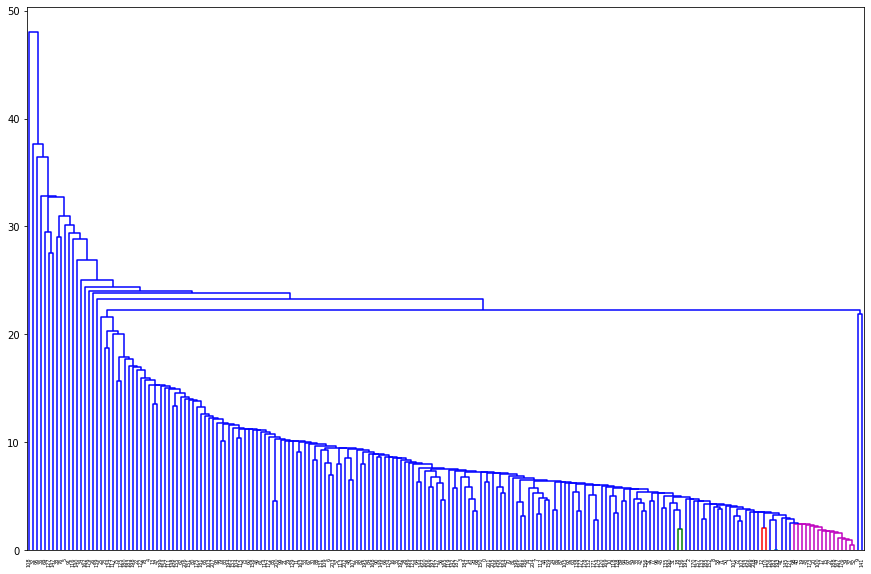

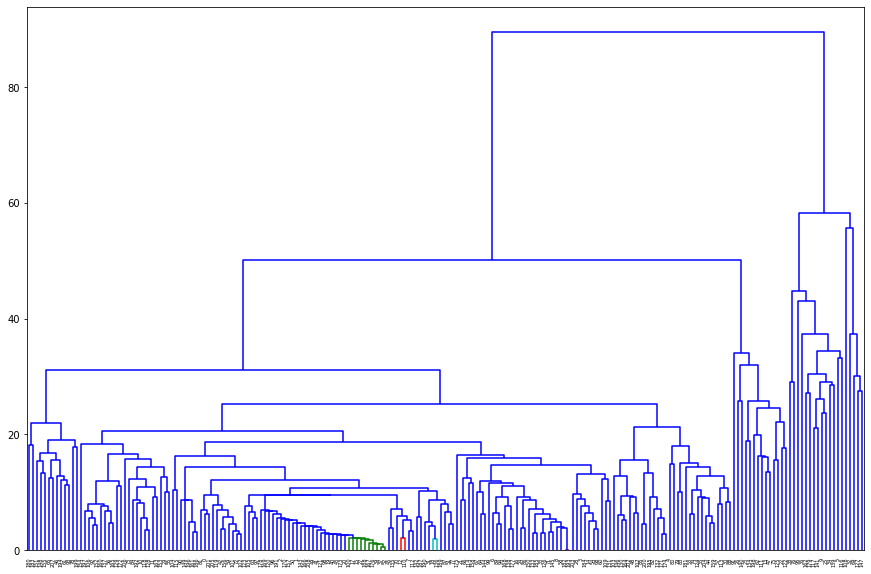

In [19]:
#4
import sys
sys.setrecursionlimit(1000000)
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
R = np.random.choice(list(range(0,len(P1))),int(len(P1)*0.03))
dist = pdist(P1[R])

linkage = ['single', 'average', 'ward']


for link in linkage:
    plt.figure(figsize=(15,10))
    a = hierarchy.linkage(dist,link)
    hierarchy.dendrogram(a,color_threshold=2.5)
    plt.show()
    

## 3. Performing clustering and visualising the clusters
1. Use the projected dataset you got from task 1 project it to 2D using t-SNE(sklearn.manifold.TSNE). On the t-SNE projected dataset perform the same tasks as in task 2. 
2. Make four scatter plots for the four best models you got in task 3.1, by coloring points according to their cluster.
3. Using the model with the best silhouette score examine some movies that are in the same cluster, what do the clusters show?